# T81-558: Applications of Deep Neural Networks
**Module 9: Regularization: L1, L2 and Dropout**
* Instructor: [Jeff Heaton](https://sites.wustl.edu/jeffheaton/), McKelvey School of Engineering, [Washington University in St. Louis](https://engineering.wustl.edu/Programs/Pages/default.aspx)
* For more information visit the [class website](https://sites.wustl.edu/jeffheaton/t81-558/).

# Module Video Material

Main video lecture:

* [Part 9.1: Introduction to Keras Transfer Learning](https://www.youtube.com/watch?v=xyymDGReKdY&list=PLjy4p-07OYzulelvJ5KVaT2pDlxivl_BN&index=26)
* [Part 9.2: Popular Pretrained Neural Networks for Keras](https://www.youtube.com/watch?v=CEFcwpBneFo&list=PLjy4p-07OYzulelvJ5KVaT2pDlxivl_BN&index=27)
* [Part 9.3: Transfer Learning for Computer Vision and Keras](https://www.youtube.com/watch?v=JPqwyuK7bPg&list=PLjy4p-07OYzulelvJ5KVaT2pDlxivl_BN&index=28)
* [Part 9.4: Transfer Learning for Languages and Keras](https://www.youtube.com/watch?v=JPqwyuK7bPg&list=PLjy4p-07OYzulelvJ5KVaT2pDlxivl_BN&index=28)
* [Part 9.5: Transfer Learning for Keras Feature Engineering](https://www.youtube.com/watch?v=JPqwyuK7bPg&list=PLjy4p-07OYzulelvJ5KVaT2pDlxivl_BN&index=28)

# Part 9.1: Introduction to Keras Transfer Learning



# Part 9.2: Popular Pretrained Neural Networks for Keras


Keras contains built in support for several pretrained models.  The the [complete list](https://keras.io/applications/) can be found in the Keras documentation.

### DenseNet
### InceptionResNetV2
### InceptionV3
### MobileNet
### MobileNetV2
### NASNet
### ResNet, ResNetV2, ResNeXt
### VGG16
### VGG19
### Xception

# Part 9.3: Transfer Learning for Computer Vision and Keras


In [1]:
import pandas as pd
import numpy as np
import os
import keras
import matplotlib.pyplot as plt
from keras.layers import Dense,GlobalAveragePooling2D
from keras.applications import MobileNet
from keras.preprocessing import image
from keras.applications.mobilenet import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.optimizers import Adam

Using TensorFlow backend.


In [2]:
model = MobileNet(weights='imagenet',include_top=True)

17227776/17225924 [==============================] - 10s 1us/step


In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
__________

'___________________________________________________________________________________________'

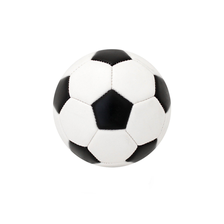

[805]
('n04254680', 'soccer_ball', 0.9999937)
('n03530642', 'honeycomb', 3.862441e-06)
('n03255030', 'dumbbell', 4.4424362e-07)
('n02782093', 'balloon', 3.7038632e-07)
('n04548280', 'wall_clock', 3.1438896e-07)


'___________________________________________________________________________________________'

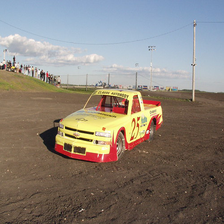

[751]
('n04037443', 'racer', 0.7131944)
('n03100240', 'convertible', 0.10089745)
('n04285008', 'sports_car', 0.07707635)
('n03930630', 'pickup', 0.026353199)
('n02704792', 'amphibian', 0.011636278)


'___________________________________________________________________________________________'

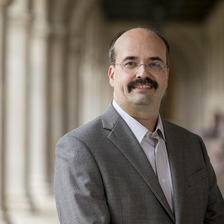

[834]
('n04350905', 'suit', 0.98860943)
('n04591157', 'Windsor_tie', 0.004567455)
('n10148035', 'groom', 0.0029069718)
('n04479046', 'trench_coat', 0.001326871)
('n02992529', 'cellular_telephone', 0.00035402752)


'___________________________________________________________________________________________'

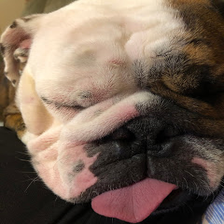

[254]
('n02110958', 'pug', 0.49527988)
('n02108915', 'French_bulldog', 0.39188683)
('n02108089', 'boxer', 0.05534879)
('n02108422', 'bull_mastiff', 0.021636484)
('n02112706', 'Brabancon_griffon', 0.016767042)


In [68]:
%matplotlib inline
from PIL import Image, ImageFile
from matplotlib.pyplot import imshow
import requests
import numpy as np
from io import BytesIO
from IPython.display import display, HTML
from keras.applications.mobilenet import decode_predictions

IMAGE_WIDTH = 224
IMAGE_HEIGHT = 224
IMAGE_CHANNELS = 3

images = [
    "https://cdn.shopify.com/s/files/1/0712/4751/products/SMA-01_2000x.jpg?v=1537468751",
    "https://farm2.static.flickr.com/1394/967537586_87b1358ad3.jpg",
    "https://sites.wustl.edu/jeffheaton/files/2016/07/jheaton_wustl1-262izm5-458x458.jpg",
    "https://1.bp.blogspot.com/-0vGbvWUrSAA/XP-OurPTA4I/AAAAAAAAgtg/TGx6YiGBEGIMjnViDjvVnYzYp__DJ6I-gCLcBGAs/s320/B%252Bt%2525aMbJQkm3Z50rqput%252BA.jpg"
]


def make_square(img):
    cols,rows = img.size
    
    if rows>cols:
        pad = (rows-cols)/2
        img = img.crop((pad,0,cols,cols))
    else:
        pad = (cols-rows)/2
        img = img.crop((0,pad,rows,rows))
    
    return img
        
for url in images:
    x = []
    ImageFile.LOAD_TRUNCATED_IMAGES = False
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    img.load()
    img = img.resize((IMAGE_WIDTH,IMAGE_HEIGHT),Image.ANTIALIAS)
    
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    pred = model.predict(x)
    
    display("___________________________________________________________________________________________")
    display(img)
    print(np.argmax(pred,axis=1))

    lst = decode_predictions(pred, top=5)
    for itm in lst[0]:
        print(itm)

In [50]:
pred = model.predict(x)

In [51]:
pred2 = np.argmax(pred,axis=1)
pred2

array([599, 904])

In [57]:

print(txt)

[[('n03530642', 'honeycomb', 0.16508563), ('n07248320', 'book_jacket', 0.15321428)], [('n04589890', 'window_screen', 0.19999677), ('n03196217', 'digital_clock', 0.19026165)]]


### Transfer

In [69]:
base_model=MobileNet(weights='imagenet',include_top=False) #imports the mobilenet model and discards the last 1000 neuron layer.

x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1000,activation='relu')(x) 
x=Dense(1000,activation='relu')(x) 
x=Dense(500,activation='relu')(x) 
preds=Dense(3,activation='softmax')(x) 

/Users/jheaton/miniconda3/envs/wustl/lib/python3.6/site-packages/keras_applications/mobilenet.py:207: UserWarning: MobileNet shape is undefined. Weights for input shape (224, 224) will be loaded.
  warnings.warn('MobileNet shape is undefined.'


17227776/17225924 [==============================] - 18s 1us/step


In [70]:
model=Model(inputs=base_model.input,outputs=preds)


for layer in model.layers[:20]:
    layer.trainable=False
for layer in model.layers[20:]:
    layer.trainable=True

In [74]:
train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input) 

train_generator=train_datagen.flow_from_directory('/Users/jheaton/Downloads/trans', 
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 shuffle=True)

Found 9 images belonging to 3 classes.


In [75]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

step_size_train=train_generator.n//train_generator.batch_size
model.fit_generator(generator=train_generator,
                   steps_per_epoch=step_size_train,
                   epochs=5)

Epoch 1/5


AttributeError: 'ProgbarLogger' object has no attribute 'log_values'

# Part 9.4: Transfer Learning for Languages and Keras


# Part 9.5: Transfer Learning for Keras Feature Engineering

# Module 9 Assignment

You can find the first assignment here: [assignment 9](https://github.com/jeffheaton/t81_558_deep_learning/blob/master/assignments/assignment_yourname_class9.ipynb)